In [5]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [8]:
#one-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 255us/step - loss: 0.1101 - acc: 0.9567 - val_loss: 1.0777 - val_acc: 0.8080
Epoch 2/20
7982/7982 [==============================] - 2s 254us/step - loss: 0.1057 - acc: 0.9577 - val_loss: 1.1099 - val_acc: 0.8030
Epoch 3/20
7982/7982 [==============================] - 2s 281us/step - loss: 0.1072 - acc: 0.9587 - val_loss: 1.0916 - val_acc: 0.8000
Epoch 4/20
7982/7982 [==============================] - 2s 258us/step - loss: 0.1079 - acc: 0.9568 - val_loss: 1.0989 - val_acc: 0.7980
Epoch 5/20
7982/7982 [==============================] - 2s 254us/step - loss: 0.1018 - acc: 0.9580 - val_loss: 1.1380 - val_acc: 0.8020
Epoch 6/20
7982/7982 [==============================] - 2s 275us/step - loss: 0.1032 - acc: 0.9565 - val_loss: 1.1775 - val_acc: 0.7890
Epoch 7/20
7982/7982 [==============================] - 2s 297us/step - loss: 0.1016 - acc: 0.9567 - val_loss: 1.1312 - val_acc: 0.8010


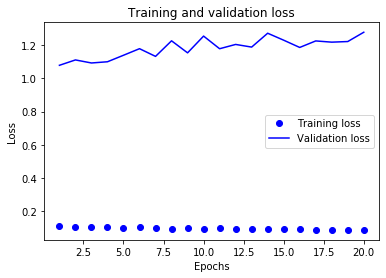

In [19]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

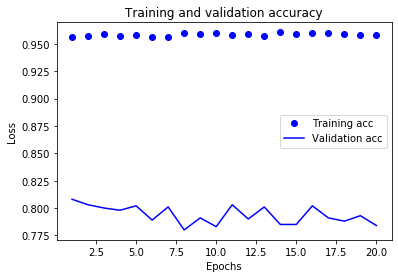

In [20]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 364us/step - loss: 2.7783 - acc: 0.5021 - val_loss: 1.8357 - val_acc: 0.6200
Epoch 2/9
7982/7982 [==============================] - 2s 296us/step - loss: 1.4835 - acc: 0.6922 - val_loss: 1.3450 - val_acc: 0.7000
Epoch 3/9
7982/7982 [==============================] - 2s 296us/step - loss: 1.0786 - acc: 0.7731 - val_loss: 1.1510 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 2s 253us/step - loss: 0.8462 - acc: 0.8225 - val_loss: 1.0429 - val_acc: 0.7740
Epoch 5/9
7982/7982 [==============================] - 2s 270us/step - loss: 0.6726 - acc: 0.8593 - val_loss: 0.9652 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 2s 303us/step - loss: 0.5372 - acc: 0.8887 - val_loss: 0.9398 - val_acc: 0.8040
Epoch 7/9
7982/7982 [==============================] - 2s 251us/step - loss: 0.4358 - acc: 0.9093 - val_loss: 0.8883 - val_acc: 0.8190
Epoch 8

In [22]:
results

[0.9897605383491686, 0.7876224398931434]

In [23]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1856634016028495

In [26]:
predictions = model.predict(x_test)
# print(predictions)

In [27]:
predictions[0].shape


(46,)

In [28]:
np.sum(predictions[0])


0.9999999

In [29]:
np.argmax(predictions[0])


3